Example for the usage of pyspectrum in loading data files into spectrum. 
this will include two types of data files - 
1. channel-counts
2. time-channel type files into Spectrum

In [6]:
from pyspectrum import Spectrum, TimeChannelParser
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

channel- counts

In [4]:
path = './spectra/152Eu_calsource_10cm_85ks.txt'
spectrum = pd.read_csv(path, names=['counts'])
spectrum['channel'] = spectrum.index 
spectrum = Spectrum.from_dataframe(spectrum)


Text(0, 0.5, 'counts')

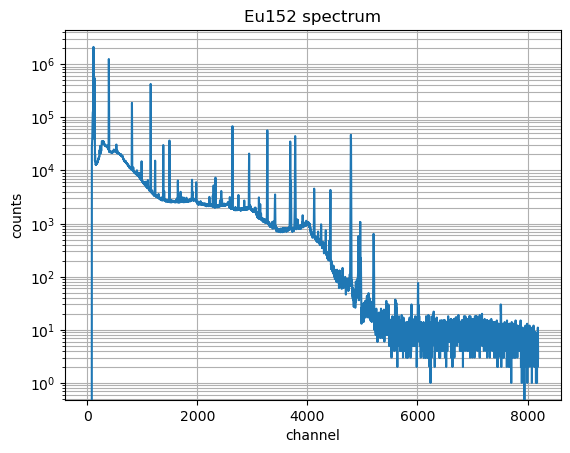

In [7]:
spectrum.xr_spectrum().plot(yscale='log')
plt.grid(True, which='both')
plt.title('Eu152 spectrum')
plt.xlabel('channel')
plt.ylabel('counts')

time-channel

In [21]:
path = './spectra/time_channel_to_spectrum.txt'
t_c_parser = TimeChannelParser()
energy_calib_poly = np.poly1d([0.0418921521, 0.0653720462])

energy_resolution = 1.08 
estimated_FWHM = lambda energy: germanium_fwhm(energy, 0, energy_resolution/511**0.5, 0)


spectrum  = t_c_parser.to_spectrum(path, energy_calibration_poly=energy_calib_poly, fwhm_calibration=estimated_FWHM,
                                   sep=' ', skiprows=5, num_of_channels=16384,)


Text(0, 0.5, 'counts')

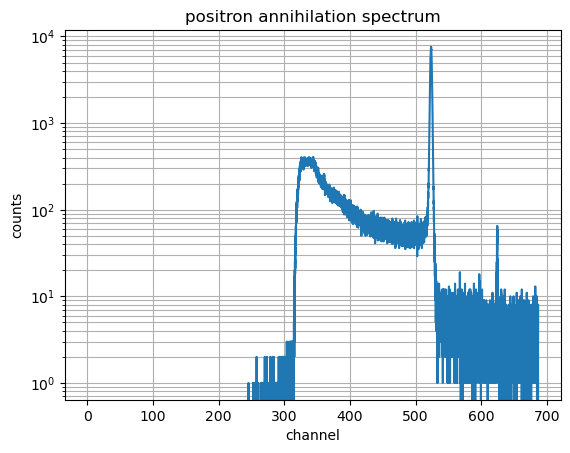

In [22]:
spectrum.xr_spectrum().plot(yscale='log')
plt.grid(True, which='both')
plt.title('positron annihilation spectrum')
plt.xlabel('channel')
plt.ylabel('counts')